In [3]:
import pandas as pd

mspus = pd.read_csv("../data/raw/MSPUS.csv")
income = pd.read_csv("../data/raw/MEHOINUSA646N.csv")

mspus.head()

,observation_date,MSPUS
0,1963-01-01,17800
1,1963-04-01,18000
2,1963-07-01,17900
3,1963-10-01,18500
4,1964-01-01,18500


In [4]:
income.head()

,observation_date,MEHOINUSA646N
0,1984-01-01,22420
1,1985-01-01,23620
2,1986-01-01,24900
3,1987-01-01,26060
4,1988-01-01,27230


In [5]:
mspus.isna().any().any()


False

In [6]:
income.isna().any().any()

False

In [7]:
mspus['observation_date'] = pd.to_datetime(mspus['observation_date'])
mspus['year'] = mspus['observation_date'].dt.year

In [8]:
mspus

,observation_date,MSPUS,year
0,1963-01-01,17800,1963
1,1963-04-01,18000,1963
2,1963-07-01,17900,1963
3,1963-10-01,18500,1963
4,1964-01-01,18500,1964
...,...,...,...
245,2024-04-01,414500,2024
246,2024-07-01,415300,2024
247,2024-10-01,419300,2024
248,2025-01-01,423100,2025


In [9]:
mspus_annual = (
    mspus.groupby('year')['MSPUS']
         .mean()
         .reset_index()
)

In [10]:
mspus_annual.head()

,year,MSPUS
0,1963,18050.0
1,1964,18925.0
2,1965,20125.0
3,1966,21500.0
4,1967,22750.0


In [11]:
income['observation_date'] = pd.to_datetime(income['observation_date'])
income['year'] = income['observation_date'].dt.year

income_annual = income[['year', 'MEHOINUSA646N']]


In [12]:
merged_ann = pd.merge(
    mspus_annual, 
    income_annual,
    on='year',
    how='inner'
)

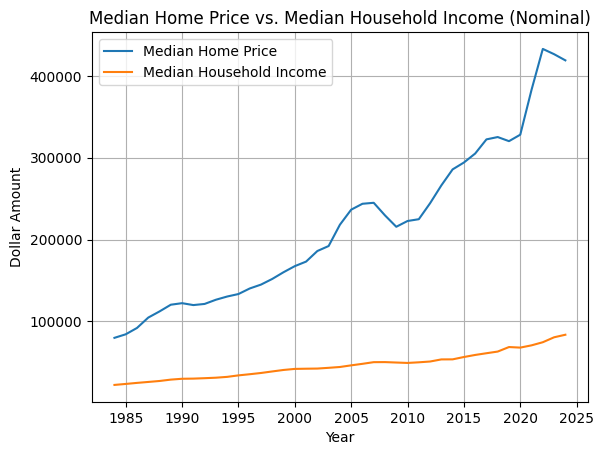

In [13]:
import matplotlib.pyplot as plt
plt.plot(merged_ann['year'], merged_ann['MSPUS'], label='Median Home Price')
plt.plot(merged_ann['year'], merged_ann['MEHOINUSA646N'], label='Median Household Income')
plt.title("Median Home Price vs. Median Household Income (Nominal)")
plt.xlabel("Year")
plt.ylabel("Dollar Amount")
plt.legend()
plt.grid(True)

In [14]:
merged_ann.to_csv("../data/processed/merged_housing_income.csv", index=False)
